In [2]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from shapely import points

sys.path.append(os.path.abspath(os.path.join(os.path.dirname('seaducks'), '..')))
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('data'), '..')))


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

plt.style.use('ggplot')


In [3]:
drifter_dataset = pd.read_hdf('../data/corrected_velocity_drifter_fifth_set_sst_gradient.h5')

In [10]:
np.max(np.array(drifter_dataset['lat']))

59.999

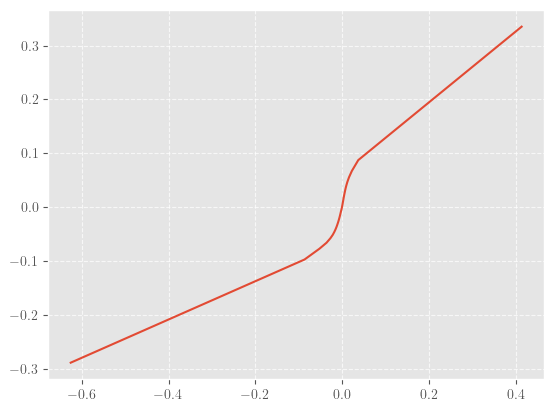

In [3]:
# whole region

sst_x_gradient = drifter_dataset.query('sst_x_derivative == sst_x_derivative')['sst_x_derivative'].values
sst_y_gradient = drifter_dataset.query('sst_y_derivative == sst_y_derivative')['sst_y_derivative'].values

q_q_plot_laplace(sst_y_gradient)
# its even faster growing that laplace in the middle!?

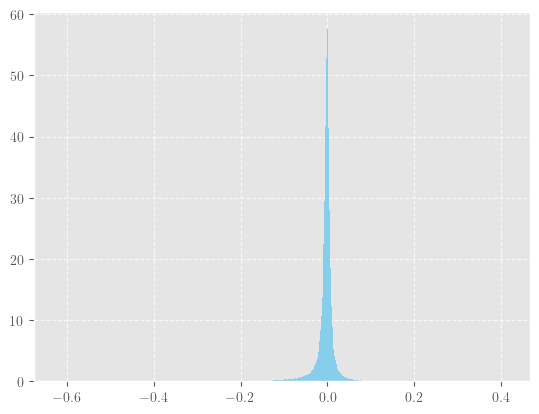

In [7]:
# whole region
fig, ax = plt.subplots()
ax.grid(True,linestyle='--',alpha=0.7)
plt.hist(sst_y_gradient,bins = 1000,density=True,color='skyblue')
plt.show()

In [15]:
# without the gulf stream region
sst_x_gradient_outside_gulfstream = drifter_dataset.query('sst_x_derivative == sst_x_derivative and not (-75 < lon < -55) and not (35 <lat <40)')['sst_x_derivative'].values
sst_y_gradient_outside_gulfstream= drifter_dataset.query('sst_y_derivative == sst_y_derivative and not (-75 < lon < -55) and not (35 <lat <40)')['sst_y_derivative'].values

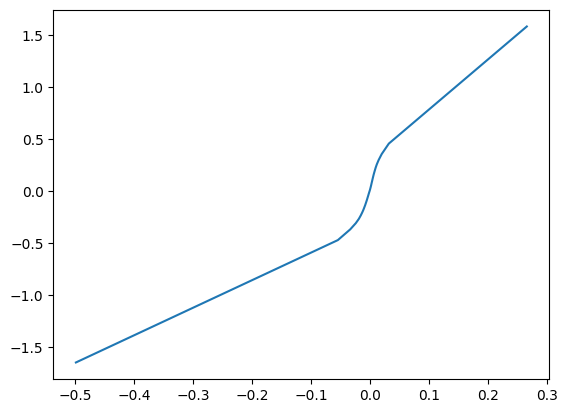

In [19]:
q_q_plot_laplace(sst_y_gradient_outside_gulfstream)

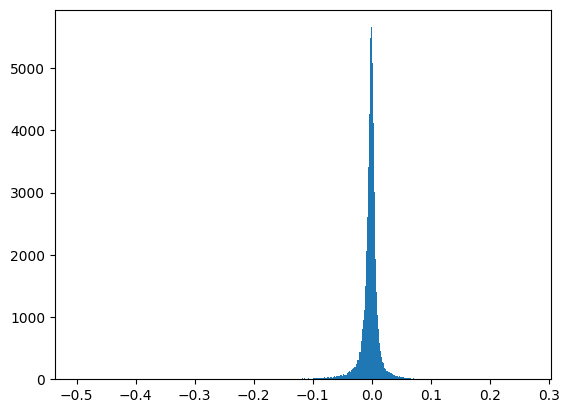

In [21]:
plt.hist(sst_y_gradient_outside_gulfstream,bins=1000)
plt.show()

In [3]:
# absolute values

sst_gradient_outside_gulfstream = drifter_dataset.query('sst_x_derivative == sst_x_derivative and sst_y_derivative == sst_y_derivative and not (-75 < lon < -55) and not (35 <lat <40)')[['sst_x_derivative','sst_y_derivative']].values
norm_sst_gradient = np.array(np.linalg.norm(sst_gradient_outside_gulfstream,axis=1))

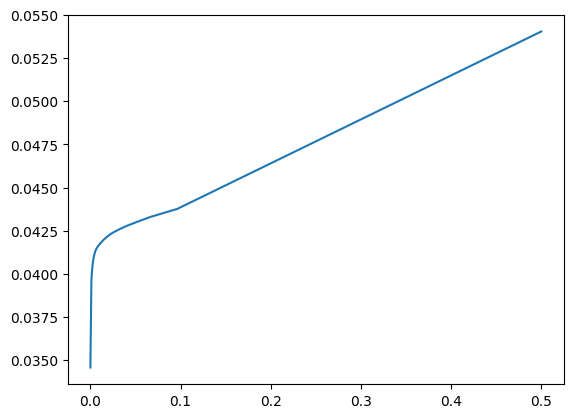

In [4]:
q_q_plot_log_laplace(norm_sst_gradient)
# still need to figure out the right shape

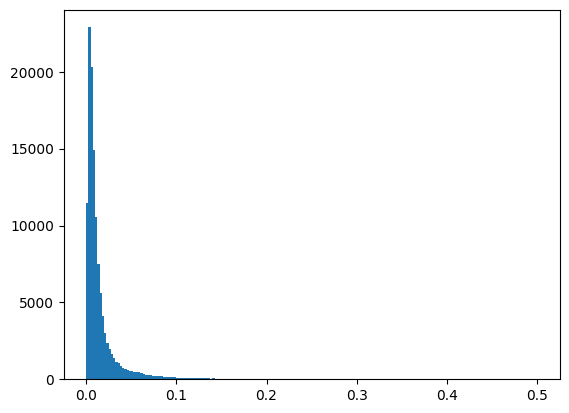

In [6]:
plt.hist(norm_sst_gradient,200)
plt.show()

In [22]:
# in the gulf stream

sst_x_gradient_in_gulfstream = drifter_dataset.query('sst_x_derivative == sst_x_derivative and -75 < lon < -55 and 35 <lat <40')['sst_x_derivative'].values
sst_y_gradient_in_gulfstream= drifter_dataset.query('sst_y_derivative == sst_y_derivative and -75 < lon < -55 and 35 <lat <40')['sst_y_derivative'].values

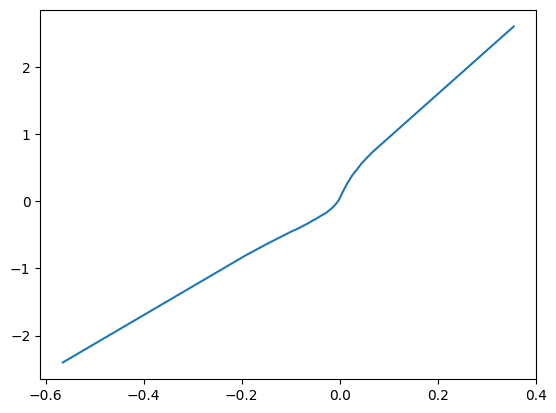

In [28]:
q_q_plot_laplace(sst_y_gradient_in_gulfstream)

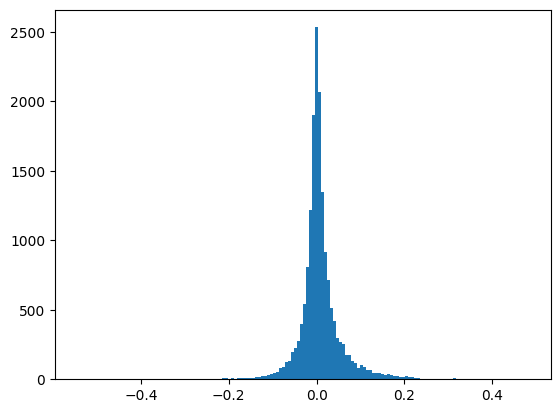

In [33]:
plt.hist(sst_x_gradient_in_gulfstream,bins=150)
plt.show()

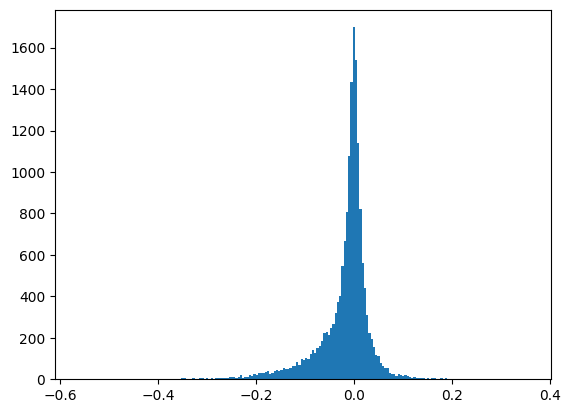

In [35]:
plt.hist(sst_y_gradient_in_gulfstream,bins=200)
plt.show()

In [58]:
# in the Labrador Sea

c,m = np.polyfit([51.4,-52.02],[52.02,-55.15],1)
sst_x_gradient_labrador = drifter_dataset.query('sst_x_derivative == sst_x_derivative and lat > @m*lon + @c')['sst_x_derivative'].values
sst_y_gradient_labrador = drifter_dataset.query('sst_y_derivative == sst_y_derivative and lat> @m*lon + @c')['sst_y_derivative'].values

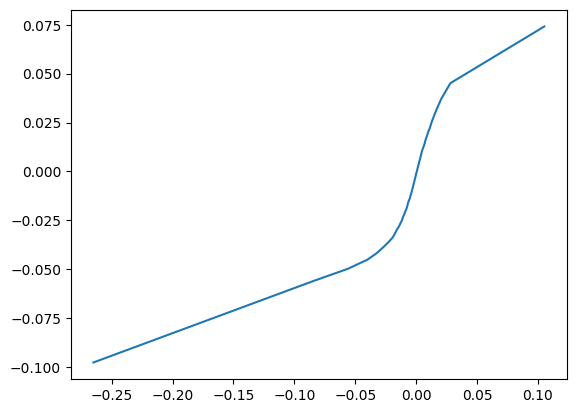

In [63]:
q_q_plot_normal(sst_y_gradient_labrador)

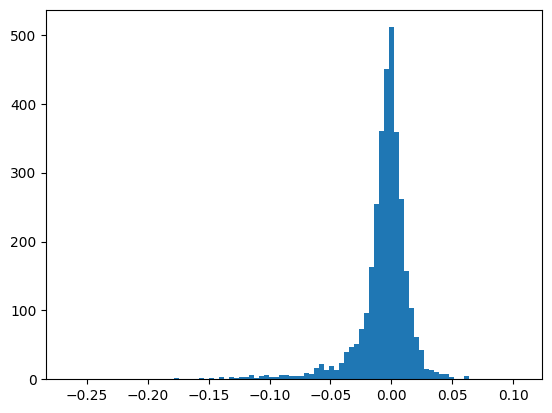

In [67]:
plt.hist(sst_y_gradient_labrador,bins = 90)
plt.show()